In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

from nltk.sentiment.vader import SentimentIntensityAnalyzer

/opt/conda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


## Data Wrangling

In [ ]:
# read and show some rows 
df = pd.read_csv('../input/bitcoin-tweets/Bitcoin_tweets.csv')
df.head()

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False
1,CryptoND,NaN,😎 BITCOINLIVE is a Dutch platform aimed at inf...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False
2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False
3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False
4,Alex Kirchmaier 🇦🇹🇸🇪 #FactsSuperspreader,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False


**Tweets start from [2021-02-10]**

In [ ]:
# show last 5 rows
df.tail()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
1999529,Oleg,NaN,https://t.co/1TtQwV1vwA,2011-11-23 16:10:16,529.0,42.0,155.0,False,2021-12-29 19:53:40,OlegBarca's Stream №547! Live in few mins!\n\n...,"['stake', 'gambling', 'casino', 'btc']",Twitter Web App,False
1999530,Michael Scott 🟩,Pennsylvania,I love inside jokes. I hope to be a part of on...,2011-12-01 16:24:40,1117.0,47.0,537.0,False,2021-12-29 19:53:36,Crypto: MistToken\nSymbol: #MistSwap \nMistSwa...,"['MistSwap', 'BCH', 'SmartBCH', 'Blockchain', ...",Twitter Web App,False
1999531,Alan,NaN,"New journey , learning to trade 📈📉. Crypto & S...",2020-11-27 11:57:34,26.0,336.0,1102.0,False,2021-12-29 19:53:33,"Just 🔒 for 3x , what about you ? \n\n@AccelDef...","['btc', 'accel', 'Ethereum', 'Crypto', 'Crypto...",Twitter for iPhone,False
1999532,Inari gr,NaN,NaN,2021-11-17 03:13:48,67.0,415.0,3798.0,False,2021-12-29 19:53:31,@Bitboy_Crypto A $Inari Trailer Video has been...,"['P2EGaming', 'sandbox', 'Mana', 'BTC', 'ETH',...",Twitter Web App,False
1999533,Leilani Pips™,"Hawaii, USA",Queen of Momo. I run the Pips To Dollars Tra...,2009-05-03 18:26:13,11162.0,315.0,50923.0,False,2021-12-29 19:53:31,CNBC has a crypto special tonight... you know ...,['BTC'],Twitter Web App,False


**Tweets ends at [2021-12-29]**

**so we have tweets from 10 months window.**

In [ ]:
# show tweets data size
df.shape

(1999534, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999534 entries, 0 to 1999533
Data columns (total 13 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_name         object 
 1   user_location     object 
 2   user_description  object 
 3   user_created      object 
 4   user_followers    float64
 5   user_friends      object 
 6   user_favourites   object 
 7   user_verified     object 
 8   date              object 
 9   text              object 
 10  hashtags          object 
 11  source            object 
 12  is_retweet        object 
dtypes: float64(1), object(12)
memory usage: 198.3+ MB


## Data Cleaning

In [ ]:
# drop non-knowon hashtags and date nan values
df = df.dropna()#df.dropna(subset=['date', 'hashtags']).reset_index(drop=True)

In [ ]:
# select first milion second on the data set
#df = df[:10000]

# drop unnecessary columns
df = df[['date', 'text']].reset_index(drop=True)

In [ ]:
#pd.to_datetime(df['date'])

There is some non-sense **data** in the date columns we have to remove

In [ ]:
# # select index for non-sense data
# drop_idx0 = df[df.date == "['ETH', 'BTC', 'Bitcoin']"].index
# drop_idx3 = df[df.date == "['btc']"].index
# drop_idx1 = df[df.date == "['cryptocurrency', 'BSC', 'Bitcoin', 'Ethereum', 'ETH', 'Airdrop', 'bounty', 'ESHOP', 'Airdrops']"].index
# drop_idx2 = df[df.date == "['YieldFarming', 'Airdrop', 'Binance', 'Bitcoin', 'pancakeswap', 'BNB', 'cryptocurrency', 'DeFi', 'BTC', 'BinanceSmartChain', 'BSC', 'pufferswap', 'DeFi', 'bsc', 'bnb', 'bitcoin', 'cryto', 'Airdrop', 'Airdrop']"].index
# idx = df.index[[drop_idx0[0], drop_idx1[0], drop_idx2[0], drop_idx3[0], drop_idx3[1]]]

# # drop all non-sense rows
# df1 = df.drop(idx)

In [ ]:
#df.shape, 
#df = df1.copy()

In [ ]:
# convert date columns to datetime type
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# show some rows
df.head()

,date,text
0,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...
1,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...
2,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...
3,2021-02-10 23:53:17,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...
4,2021-02-10 23:52:08,.@Tesla’s #bitcoin investment is revolutionary...


### Clean [TEXT] column

In [ ]:
# show tweet
t = df.text[0]
t

'Blue Ridge Bank shares halted by NYSE after #bitcoin ATM announcement https://t.co/xaaZmaJKiV @MyBlueRidgeBank… https://t.co/sgBxMkP1SI'

In [ ]:
# helper function
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    #tweet = re.sub('#[A-Za-z0-9]+', '', tweet) # removes any string with a '#'
    #tweet = re.sub('\n', '', tweet) # removes the '\n' string
    tweet = " ".join(tweet.split())
    #tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    tweet = remove_emojis(tweet)
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    return tweet.strip()

In [ ]:
import re
import emoji
import nltk
from tqdm import tqdm

cleaner(t)

'Blue Ridge Bank shares halted by NYSE after bitcoin ATM announcement …'

In [ ]:
# apply cleaner
#df['text__'] = df['text'].map(lambda x: cleaner(x))
#df['text__'][:5]

In [ ]:
# apply cleaner
clean_tweets = []
for tweet in tqdm(df.text):
    ct = cleaner(tweet)
    clean_tweets.append(ct)
    
df['clean_text'] = clean_tweets
df['clean_text'][:5]

100%|██████████| 980429/980429 [00:32<00:00, 30510.39it/s]


0    Blue Ridge Bank shares halted by NYSE after bi...
1    This network is secured by 9 508 nodes as of t...
2    Trade Crypto on Binance  Enjoy Cashback 10% of...
3        &lt;'fire' &amp; 'man'&gt; Bitcoin Crypto BTC
4    .’s bitcoin investment is revolutionary for cr...
Name: clean_text, dtype: object

## SentiStrength

In [ ]:
# SentiStrength helper
def compute_vader_scores(df, label):
    sid = SentimentIntensityAnalyzer()
    df["vader_negative"] = df[label].apply(lambda x: sid.polarity_scores(x)["neg"])
    df["vader_neutral"] = df[label].apply(lambda x: sid.polarity_scores(x)["neu"])
    df["vader_positive"] = df[label].apply(lambda x: sid.polarity_scores(x)["pos"])
    #df["vader_comp"] = df[label].apply(lambda x: sid.polarity_scores(x)["compound"])
    return df

In [ ]:
# compute vader scores
vader_negative = []
vader_neutral = []
vader_positive = []

sia = SentimentIntensityAnalyzer()
for tweet in tqdm(df.text):
    ps = sia.polarity_scores(tweet)
    vader_negative.append(ps['neg'])
    vader_neutral.append(ps['neu'])
    vader_positive.append(ps['pos'])
    
df['vader_negative'] = vader_negative
df['vader_neutral'] = vader_neutral
df['vader_positive'] = vader_positive

100%|██████████| 980429/980429 [06:40<00:00, 2445.96it/s]


### Features Engineering

In [ ]:
def tweet_length(tweet):
    return len(tweet.split(' '))

# apply tweet length
tweet_lengths = []
for tweet in tqdm(df.text):
    tl = tweet_length(tweet)
    tweet_lengths.append(tl)
    
df['tweet_length'] = tweet_lengths
df['tweet_length'][:5]

100%|██████████| 980429/980429 [00:02<00:00, 379923.51it/s]


0    14
1    24
2    19
3     6
4    20
Name: tweet_length, dtype: int64

In [ ]:
def vader_scale(score, scale=4):
    scale_ = 1. / scale
    return int((score // scale_))

# apply vader scale
vader_scales = []
for score in tqdm(df.vader_neutral):
    tl = vader_scale(score)
    vader_scales.append(tl)
    
df['vader_scale'] = vader_scales
df['vader_scale'][:5]

100%|██████████| 980429/980429 [00:01<00:00, 768201.37it/s]


0    3
1    3
2    3
3    4
4    4
Name: vader_scale, dtype: int64

In [ ]:
df.vader_scale.value_counts()

3    415402
4    367580
2    186946
1     10269
0       232
Name: vader_scale, dtype: int64

In [ ]:
df.head()

,date,text,clean_text,vader_negative,vader_neutral,vader_positive,tweet_length,vader_scale
0,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,Blue Ridge Bank shares halted by NYSE after bi...,0.0,0.855,0.145,14,3
1,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,This network is secured by 9 508 nodes as of t...,0.0,0.891,0.109,24,3
2,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,Trade Crypto on Binance Enjoy Cashback 10% of...,0.0,0.824,0.176,19,3
3,2021-02-10 23:53:17,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...,&lt;'fire' &amp; 'man'&gt; Bitcoin Crypto BTC,0.0,1.000,0.000,6,4
4,2021-02-10 23:52:08,.@Tesla’s #bitcoin investment is revolutionary...,.’s bitcoin investment is revolutionary for cr...,0.0,1.000,0.000,20,4


In [ ]:
df.tail()

,date,text,clean_text,vader_negative,vader_neutral,vader_positive,tweet_length,vader_scale
980424,2021-12-29 19:54:26,@Ljudkontoret @TagTeelba @CryptoMichNL That's ...,That's probably good for BTC if the $ goes dow...,0.143,0.691,0.166,52,2
980425,2021-12-29 19:53:55,I like that some of the small coins aren’t fol...,I like that some of the small coins aren’t fol...,0.000,0.872,0.128,19,3
980426,2021-12-29 19:53:47,#Bitcoin falls from ATHs have been a lot worse...,Bitcoin falls from ATHs have been a lot worse....,0.236,0.764,0.000,12,3
980427,2021-12-29 19:53:36,Crypto: MistToken\nSymbol: #MistSwap \nMistSwa...,Crypto: MistToken Symbol: MistSwap MistSwap Tw...,0.000,1.000,0.000,28,4
980428,2021-12-29 19:53:31,CNBC has a crypto special tonight... you know ...,CNBC has a crypto special tonight... you know ...,0.000,0.787,0.213,12,3


In [ ]:
df.to_csv('BTC-text-tweets-sentiment-fe.csv', index=False)

In [ ]:
# df = pd.read_csv('./BTC-text-tweets-sentiment-fe.csv')
# df.date = pd.to_datetime(df.date)
# # df.drop(['Unnamed: 0', 'date'], axis=1)
# # df.head()

In [ ]:
# # extract tweets sentiments per hour
# sent_std = df.groupby(pd.Grouper(key='date',freq='H')).std()
# sent_std = sent_std.add_suffix('_std')
# sent_mean = df.groupby(pd.Grouper(key='date',freq='H')).mean()
# sent_mean = sent_mean.add_suffix('_mean')

In [ ]:
df

,date,text,clean_text,vader_negative,vader_neutral,vader_positive,tweet_length,vader_scale
0,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,Blue Ridge Bank shares halted by NYSE after bi...,0.000,0.855,0.145,14,3
1,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,This network is secured by 9 508 nodes as of t...,0.000,0.891,0.109,24,3
2,2021-02-10 23:53:30,💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...,Trade Crypto on Binance Enjoy Cashback 10% of...,0.000,0.824,0.176,19,3
3,2021-02-10 23:53:17,&lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...,&lt;'fire' &amp; 'man'&gt; Bitcoin Crypto BTC,0.000,1.000,0.000,6,4
4,2021-02-10 23:52:08,.@Tesla’s #bitcoin investment is revolutionary...,.’s bitcoin investment is revolutionary for cr...,0.000,1.000,0.000,20,4
...,...,...,...,...,...,...,...,...
980424,2021-12-29 19:54:26,@Ljudkontoret @TagTeelba @CryptoMichNL That's ...,That's probably good for BTC if the $ goes dow...,0.143,0.691,0.166,52,2
980425,2021-12-29 19:53:55,I like that some of the small coins aren’t fol...,I like that some of the small coins aren’t fol...,0.000,0.872,0.128,19,3
980426,2021-12-29 19:53:47,#Bitcoin falls from ATHs have been a lot worse...,Bitcoin falls from ATHs have been a lot worse....,0.236,0.764,0.000,12,3
980427,2021-12-29 19:53:36,Crypto: MistToken\nSymbol: #MistSwap \nMistSwa...,Crypto: MistToken Symbol: MistSwap MistSwap Tw...,0.000,1.000,0.000,28,4


In [ ]:
# extract tweets sentiments per hour
sentiment_df = df.groupby(pd.Grouper(key='date',freq='H')).sum()

# extract No. of tweets per hour
tweet_vol = df.groupby(pd.Grouper(key='date',freq='H')).count()['text']

In [ ]:
#sentiment_df = pd.concat([sentiment_df, sent_std, sent_mean], axis=1)

# add tweets count
sentiment_df['tweets_vol'] = tweet_vol

# show some sentiment rows
sentiment_df.head()

,vader_negative,vader_neutral,vader_positive,tweet_length,vader_scale,tweets_vol
date,,,,,,
2021-02-05 10:00:00,0.000,9.207,0.793,161,35,10
2021-02-05 11:00:00,0.961,36.106,2.933,616,135,40
2021-02-05 12:00:00,0.959,58.419,6.622,1041,215,66
2021-02-05 13:00:00,1.407,53.897,3.696,920,204,59
2021-02-05 14:00:00,1.039,69.741,4.220,1116,266,75


In [ ]:
sentiment_df.describe()

,vader_negative,vader_neutral,vader_positive,tweet_length,vader_scale,tweets_vol
count,7886.000000,7886.000000,7886.000000,7886.000000,7886.000000,7886.000000
mean,4.105641,107.963531,12.255891,2878.872179,393.188816,124.325260
std,10.396293,257.309967,30.080264,6839.711603,937.402471,297.119281
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.912750,36.588750,2.891000,691.750000,137.000000,41.000000
max,122.097000,2503.141000,364.225000,53854.000000,9246.000000,2871.000000


In [ ]:
sentiment_df.isna().sum()

vader_negative    0
vader_neutral     0
vader_positive    0
tweet_length      0
vader_scale       0
tweets_vol        0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 6))
# sentiment_df['tweets_vol'].plot(kind='hist')
# #plt.xlim([0, 500]);
# plt.title('Tweets Distribution');

In [ ]:
sentiment_df.shape

(7886, 6)

In [ ]:
(sentiment_df.tweets_vol > 0).sum()

2070

## Data wrangling [Prices]

In [ ]:
df = pd.read_csv('../input/btc2021/full_data__1__2021.csv')
df.head()

,Unnamed: 0,timestamp,Asset_ID,Asset_Name,Weight,Count,Open,High,Low,Close,Volume,VWAP,Target
0,18935914,1609459260,1,NaN,NaN,4039.0,28985.511250,29086.90,28960.0,29032.387500,163.787036,29017.664870,0.000396
1,18935928,1609459320,1,NaN,NaN,1969.0,29031.175000,29079.56,28951.5,29002.956734,98.754670,29014.703526,-0.000069
2,18935942,1609459380,1,NaN,NaN,1689.0,29002.977509,29069.39,28967.8,29005.580000,55.202131,29003.078663,-0.000137
3,18935956,1609459440,1,NaN,NaN,1146.0,29004.293750,29057.73,28971.8,29000.490000,56.575903,29006.256629,-0.000682
4,18935970,1609459500,1,NaN,NaN,2088.0,28994.918934,29031.71,28929.3,28962.285818,70.319136,28972.005783,-0.000446


### Data Preprocessing

In [ ]:
from datetime import datetime

def return_datetime(timestamp):
    return datetime.fromtimestamp(timestamp)

df['date'] = df['timestamp'].apply(return_datetime)

In [ ]:
cols = ['date', 'Open', 'High', 'Low', 'Close', 'Volume']
df = df[cols]
df.head()

,date,Open,High,Low,Close,Volume
0,2021-01-01 00:01:00,28985.511250,29086.90,28960.0,29032.387500,163.787036
1,2021-01-01 00:02:00,29031.175000,29079.56,28951.5,29002.956734,98.754670
2,2021-01-01 00:03:00,29002.977509,29069.39,28967.8,29005.580000,55.202131
3,2021-01-01 00:04:00,29004.293750,29057.73,28971.8,29000.490000,56.575903
4,2021-01-01 00:05:00,28994.918934,29031.71,28929.3,28962.285818,70.319136


In [ ]:
prices_df = df.groupby(pd.Grouper(key='date',freq='H')).mean()[['Close']]

In [ ]:
max_date = sentiment_df.index.max()
min_date = sentiment_df.index.min()

min_date, max_date

(Timestamp('2021-02-05 10:00:00', freq='H'),
 Timestamp('2021-12-30 23:00:00', freq='H'))

In [ ]:
prices_df = prices_df[min_date:max_date]
prices_df.head()

,Close
date,
2021-02-05 10:00:00,37481.900629
2021-02-05 11:00:00,37607.173100
2021-02-05 12:00:00,37876.993022
2021-02-05 13:00:00,37984.115288
2021-02-05 14:00:00,38161.923202


In [ ]:
sentiment_df.head()

,vader_negative,vader_neutral,vader_positive,tweet_length,vader_scale,tweets_vol
date,,,,,,
2021-02-05 10:00:00,0.000,9.207,0.793,161,35,10
2021-02-05 11:00:00,0.961,36.106,2.933,616,135,40
2021-02-05 12:00:00,0.959,58.419,6.622,1041,215,66
2021-02-05 13:00:00,1.407,53.897,3.696,920,204,59
2021-02-05 14:00:00,1.039,69.741,4.220,1116,266,75


In [ ]:
sentiment_df.shape, prices_df.shape

((7886, 6), (7694, 1))

In [ ]:
sentiment_df.replace(0, np.nan, inplace=True)
sentiment_df.fillna(method='ffill', inplace=True)
sentiment_df.replace(np.nan, 0, inplace=True)

In [ ]:
btc = sentiment_df.join(prices_df, on='date')
btc.head()

,vader_negative,vader_neutral,vader_positive,tweet_length,vader_scale,tweets_vol,Close
date,,,,,,,
2021-02-05 10:00:00,0.000,9.207,0.793,161.0,35.0,10.0,37481.900629
2021-02-05 11:00:00,0.961,36.106,2.933,616.0,135.0,40.0,37607.173100
2021-02-05 12:00:00,0.959,58.419,6.622,1041.0,215.0,66.0,37876.993022
2021-02-05 13:00:00,1.407,53.897,3.696,920.0,204.0,59.0,37984.115288
2021-02-05 14:00:00,1.039,69.741,4.220,1116.0,266.0,75.0,38161.923202


In [ ]:
btc.isna().sum()

vader_negative      0
vader_neutral       0
vader_positive      0
tweet_length        0
vader_scale         0
tweets_vol          0
Close             192
dtype: int64

In [ ]:
btc.to_csv('BTC-tweets-sentiment-prices.csv', index=False)

In [ ]:
btc.describe()

,vader_negative,vader_neutral,vader_positive,tweet_length,vader_scale,tweets_vol,Close
count,7886.000000,7886.000000,7886.000000,7886.000000,7886.000000,7886.000000,7694.000000
mean,15.059914,366.588837,40.149348,9800.979077,1336.800279,421.797236,48716.923559
std,14.088766,315.774898,36.753124,8514.151108,1150.636881,365.509825,9431.900511
min,0.000000,1.802000,0.098000,42.000000,7.000000,2.000000,29583.449916
25%,1.689000,50.101000,3.719000,1137.000000,184.000000,55.000000,40930.194555
50%,13.946000,393.571000,40.375000,10473.000000,1426.000000,455.000000,48767.833968
75%,26.397000,584.703500,64.062000,15989.000000,2136.750000,674.000000,56910.031513
max,122.097000,2503.141000,364.225000,53854.000000,9246.000000,2871.000000,68576.718000


In [ ]:
btc.mean(0)

vader_negative       15.059914
vader_neutral       366.588837
vader_positive       40.149348
tweet_length       9800.979077
vader_scale        1336.800279
tweets_vol          421.797236
Close             48716.923559
dtype: float64

In [ ]:
btc_ = btc.dropna(axis=0)
btc_.describe()

,vader_negative,vader_neutral,vader_positive,tweet_length,vader_scale,tweets_vol,Close
count,7694.000000,7694.000000,7694.000000,7694.000000,7694.000000,7694.000000,7694.000000
mean,14.741519,360.157266,39.613856,9627.000260,1313.023525,414.511697,48716.923559
std,14.088862,316.449712,37.001649,8528.440324,1152.789335,366.439292,9431.900511
min,0.000000,1.802000,0.098000,42.000000,7.000000,2.000000,29583.449916
25%,1.689000,50.101000,3.719000,1137.000000,184.000000,55.000000,40930.194555
50%,12.897000,362.728500,40.375000,9767.500000,1319.000000,418.000000,48767.833968
75%,26.397000,583.715000,65.707750,15798.500000,2133.000000,662.000000,56910.031513
max,122.097000,2503.141000,364.225000,53854.000000,9246.000000,2871.000000,68576.718000


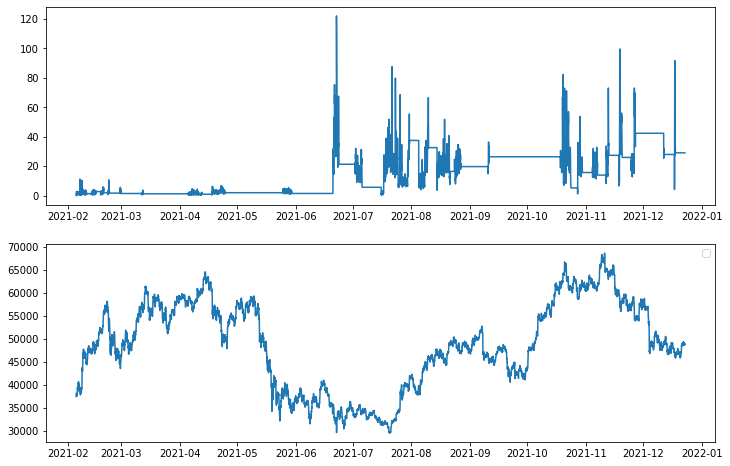

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8))
ax[0].plot(btc_.iloc[:, 0] );
ax[1].plot(btc_.iloc[:, -1] );
plt.legend();

## Neural Network 

In [ ]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

from tensorflow.keras.optimizers import SGD, Adam

from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

### Date Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X = btc_.iloc[:, :-1]
y = btc_[['Close']]

train_split = 0.9
data_len = int(y.shape[0] * train_split)

features_scaler = MinMaxScaler(feature_range=(-1, 1))
target_scaler = MinMaxScaler()

X = features_scaler.fit_transform(X)
y = target_scaler.fit_transform(y)

X_train = X[:data_len]
y_train = y[:data_len]
X_test = X[data_len:]
y_test = y[data_len:]

### Add TimeStamp

In [ ]:
sr = 2 
lb = 12*sr # hours

train_gen = TimeseriesGenerator(X_train, y_train, length=lb, sampling_rate=sr, batch_size=256)
test_gen = TimeseriesGenerator(X_test, y_test, length=lb, sampling_rate=sr, batch_size=128)

In [ ]:
# (look_back, features)
shape = train_gen[0][0].shape[1:]
shape

(12, 6)

### LSTM Model

In [ ]:
# define model
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=shape))
model.add(LSTM(4,))
model.add(Dense(1,))

# model summary
model.summary()

2022-01-04 20:18:05.768724: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-04 20:18:06.005234: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-04 20:18:06.006370: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-04 20:18:06.008147: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 12, 32)            4992      
_________________________________________________________________
lstm_1 (LSTM)                (None, 4)                 592       
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 5,589
Trainable params: 5,589
Non-trainable params: 0
_________________________________________________________________


### Model Training

In [ ]:
# model callbacks
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50, restore_best_weights=True)
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.90 ** x)

# loss function
huber_loss = tf.keras.losses.Huber()
model.compile(loss='mse', optimizer=Adam(learning_rate=0.1))

# Traning
history = model.fit(train_gen, 
                    validation_data=test_gen, 
                    callbacks=[es, reduce_lr],
                    epochs=1000,
                    verbose=0,
                   )

2022-01-04 20:18:15.254795: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-04 20:18:19.575099: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


Restoring model weights from the end of the best epoch.
Epoch 00066: early stopping


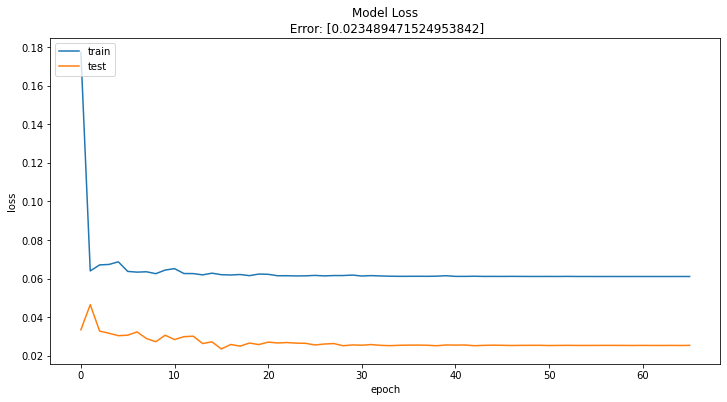

In [ ]:
# summarize history for loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(f"Model Loss\n Error: [{np.min(history.history['val_loss'])}]")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Test Model

In [ ]:
# predict and compare
pred = target_scaler.inverse_transform(model.predict(test_gen))
true = target_scaler.inverse_transform(y_test[lb:])

print('Real Mean-Aabsolute-Error:', np.mean(abs(pred-true)))

Real Mean-Aabsolute-Error: 4615.750893345617


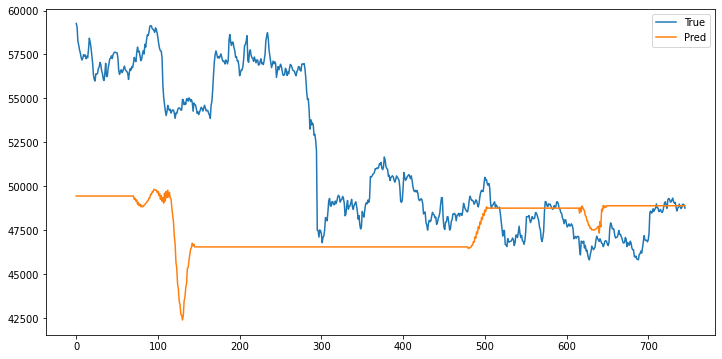

In [ ]:
# plot the results
plt.figure(figsize=(12, 6))
plt.plot(true, label='True');
plt.plot(pred, label='Pred')
plt.legend();

**Conclusions**

Mean-Aabsolute-Error seems to be high **but we have somthing very important i think we can bulid on it**, 

## **Our model realize the Volatility in prices (ups and down) very well.**

As you can see in the figure above, which is a great point to start with again.
